# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Bárbara Aguayo
- Nombre de alumno 2: Camila Figueroa

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**


1. Los datos de entrenamiento son aquellos que se utilizan para enseñarle al modelo a reconocer patrones y relaciones en los datos, lo que permite que aprenda a hacer predicciones o tomar decisiones. En cambio, los datos de validación se utilizan para evaluar el rendimiento del modelo después del entrenamiento y sirven para poder ajustar los hiper parámetros.


2. El desafío principal que se tiene al trabajar con data no supervisada es que el modelo logre identificar y clasificar patrones en los datos sin la guía de los labels, así como lograr evaluar que la clasificación se realizó correctamente. Al no contar con etiquetas no es posible medir con exactitud el desempeño del modelo lo que dificulta saber si el modelo identifica correctamente las clases.

3. La matriz de confusión es una gráfica o tabla en forma de matriz que permite visualizar la cantidad de aciertos por clase que tuvo un modelo al clasificar. Las filas de la tabla representan las clases reales y las columnas representan las clases predichas por el modelo. Se utiliza para mostrar de forma visual y clara el rendimiento que tuvo un modelo en el conjunto de test.

4. Primero definimos los siguiente conceptos:
      - Verdaderos Positivos (VP): Instancias que fueron correctamente clasificadas como positivas por el modelo.
      - Verdaderos Negativos (VN): Instancias que fueron correctamente clasificadas como negativas por el modelo.
      - Falsos Positivos (FP): Instancias que fueron incorrectamente clasificadas como positivas por el modelo (falsas alarmas).
      - Falsos Negativos (FN): Instancias que fueron incorrectamente clasificadas como negativas por el modelo (omisiones).

 - **Accuracy:**
   $$\frac{(VP + VN)}{(VP + VN + FP + FN)}$$
   
    Esta métrica muestra cuántas predicciones en general realizó correctamente el modelo con respecto al total de los datos. Un valor de accuracy alto quiere decir que la mayoría de las predicciones del modelo son correctas.

 - **Precision:**
   $$\frac{VP}{(VP + FP)}$$

    Esta métrica muestra cuántas predicciones de la clase positiva fueron correctamente clasificadas de la totalidad de datos clasificados positivos. Esta métrica hace referencia a las falsas alarmas, es decir,  una precisión alta significa que hay pocas falsas alarmas o predicciones positivas falsas.

 - **Recall:**
   $$\frac{VP}{(VP + FN)}$$

    Esta métrica muestra cuántas predicciones de la clase positiva fueron correctamente clasificadas con respecto a todas los datos positivos reales. Un valor alto de recall quiere decir que el modelo identifica correctamente la mayoría de los datos positivos.

  - **F1 score:**
    $$2 \frac{(Precision * Recall)}{(Precision + Recall)}$$

     Esta métrica corresponde a la media armónica entre precision y recall, por lo que permite equilibrar ambas métricas. En otras palabras, es útil cuando se desea minimizar tanto las falsas alarmas como los falsos negativos.

5.
  - **Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.**
    - Recall: dado que es riesgoso que no se detecte una posible falla (se desea minimizar falsos negativos)
  - **Detección de enfermedades altamente contagiosas.**
    - Recall: dado que es riesgoso que no se detecte una persona con una enfermedad muy contagiosa (se desea minimizar falsos negativos)
  - **Aprobación de créditos de alto riesgo.**
    - Precision: dado que se desea asegurar que todos los créditos aprobados sean pagados (maximizar verdaderos positivos o minimizar falsas alarmas)
  - **Detección de crímenes.**
    - F1-Score: dado que en este caso es importanque que el modelo no se equivoque al detectar un crimen que no lo es e igualmente se desea detectar la mayor cantidad de crimenes que sí ocurrieron. En otras palabras, minimizar falsas alarmas y minimizar falsos negativos al mismo tiempo.

6. La calibración de modelos corresponde a ajustar las salidas de un modelo para que reflejen con precisión las probabilidades reales de los eventos. La salida de un modelo calibrado está entre 0 y 1, lo que permite interpretar estos valores como probabilidades de que un suceso ocurra.

  Esta se usa para evitar que hayan sesgos en la distribución de las salidas, de modo que ayuda a mejorar la confianza y la exactitud de las probabilidades que un modelo de Machine Learning predice, haciendo que estas probabilidades sean más fiables en la toma de decisiones.


# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except:
#    print('Ignorando conexión drive-colab')

In [ ]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.1 

In [ ]:
# Carga de datos
from google.colab import files
uploaded = files.upload()

Saving stats_players.csv to stats_players.csv


In [ ]:
#Librerías
import os
import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from pycaret.classification import *

In [ ]:
df_players = pd.read_csv("/content/stats_players.csv")
df_players.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [ ]:
#Creamos una clase a partir de los valores NaN, que se llama "No seleccionado"
#df["National_Position"] = df["National_Position"].apply(lambda x: "No seleccionado" if x is np.nan else x)
#df["label"] = df["National_Position"].apply(lambda x: 0 if x == "No seleccionado" else 1)
df_players["label"] = df_players["National_Position"].apply(lambda x: 0 if x is np.nan else 1)

In [ ]:
#Se borra columna de la que se extrajo los labels y Name dado que no es una caracteristic auqe pueda ontribuir en la clasificación
df = df_players.drop(columns=["National_Position"])
df = df.drop(columns=["Name"])

In [ ]:
print(f"Cantidad de ejemplos de la clase 'Seleccionados': {len(df[df['label']==1])}")
print(f"Cantidad de ejemplos de la clase 'No Seleccionados': {len(df[df['label']==0])}")

Cantidad de ejemplos de la clase 'Seleccionados': 1075
Cantidad de ejemplos de la clase 'No Seleccionados': 16513


**Comente lo que observa**

A partir del resultado anterior, se puede observar que las clases están ampliamente desbalanceadas, dado que una contiene una contiene una cantidad 10 veces mayor que la cantidad de la otra.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nationality        17588 non-null  object
 1   Club_Position      17587 non-null  object
 2   Height             17588 non-null  int64 
 3   Weight             17588 non-null  int64 
 4   Preffered_Foot     17588 non-null  object
 5   Age                17588 non-null  int64 
 6   Work_Rate          17588 non-null  object
 7   Weak_foot          17588 non-null  int64 
 8   Skill_Moves        17588 non-null  int64 
 9   Ball_Control       17588 non-null  int64 
 10  Dribbling          17588 non-null  int64 
 11  Marking            17588 non-null  int64 
 12  Sliding_Tackle     17588 non-null  int64 
 13  Standing_Tackle    17588 non-null  int64 
 14  Aggression         17588 non-null  int64 
 15  Reactions          17588 non-null  int64 
 16  Interceptions      17588 non-null  int64

In [ ]:
print(df.isna().sum())

Nationality          0
Club_Position        1
Height               0
Weight               0
Preffered_Foot       0
Age                  0
Work_Rate            0
Weak_foot            0
Skill_Moves          0
Ball_Control         0
Dribbling            0
Marking              0
Sliding_Tackle       0
Standing_Tackle      0
Aggression           0
Reactions            0
Interceptions        0
Vision               0
Composure            0
Crossing             0
Short_Pass           0
Long_Pass            0
Acceleration         0
Speed                0
Stamina              0
Strength             0
Balance              0
Agility              0
Jumping              0
Heading              0
Shot_Power           0
Finishing            0
Long_Shots           0
Curve                0
Freekick_Accuracy    0
Penalties            0
Volleys              0
label                0
dtype: int64


In [ ]:
num_total_columns = df.select_dtypes('int').columns
cate_ints_columns = df[["Weak_foot", "Skill_Moves", "label"]].columns #variables categoricas que ya están en formato numérico por lo que no se hace un preprocesamiento
num_columns = df[list(x for x in num_total_columns if x not in cate_ints_columns)].columns
cate_columns = df.select_dtypes('object').columns

In [ ]:
num_columns

Index(['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

In [ ]:
cate_columns

Index(['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate'], dtype='object')

In [ ]:
cate_ints_columns

Index(['Weak_foot', 'Skill_Moves', 'label'], dtype='object')

In [ ]:
col_transformer = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), cate_columns),
    ('StandardScaler', StandardScaler(), num_columns),
    ])

**Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material Player_Stats_Report.html que viene en el zip del lab), al igual que las transformaciones aplicadas**

Para las variables categóricas, se decidió utilizar la transformación OneHotEncoder. Esta elección se basa en que las variables categóricas están representadas como texto y, para que los modelos puedan procesarlas adecuadamente, es necesario convertirlas a variables numéricas.

En el caso de las variables numéricas, se observa en el material de "Player_Stats_Report.html" que las distribuciones de estas variables no presentan grandes problemas de outliers, por lo que no se aplicó MinMaxScaler. Sin embargo, se detectó que muchas de estas variables no siguen una distribución normal o similar. Por lo que, para abordar esto, se decidió aplicar StandardScaler.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [ ]:
features = df.drop(columns=["label"])
labels = df.loc[:, "label"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
pipeline_xgboost = Pipeline([
    ("col_trans", col_transformer),
    ("xgboost", XGBClassifier())
])

pipeline_lightgbm = Pipeline([
    ("col_trans", col_transformer),
    ("lgbm", LGBMClassifier(verbose=-1))
])

In [ ]:
pipeline_xgboost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('col_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [ ]:
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('col_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0,
                                verbose=-1))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [ ]:
pred_xgb = pipeline_xgboost.predict(X_test)

In [ ]:
pred_lgbm = pipeline_lightgbm.predict(X_test)

In [ ]:
#Accuracy general
acc_xgb = accuracy_score(y_test, pred_xgb)
acc_lgbm = accuracy_score(y_test, pred_lgbm)
print(f"Accuracy XGBoost: {acc_xgb}")
print(f"Accuracy LightGBM: {acc_lgbm}")

#Precision
precision_xgb = precision_score(y_test, pred_xgb, pos_label=1)
precision_lgbm = precision_score(y_test, pred_lgbm, pos_label=1)
print(f"Precision XGBoost: {precision_xgb}")
print(f"Precision LightGBM: {precision_lgbm}")

#Recall
recall_xgb = recall_score(y_test, pred_xgb, pos_label=1)
recall_lgbm = recall_score(y_test, pred_lgbm, pos_label=1)
print(f"Recall XGBoost: {recall_xgb}")
print(f"Recall LightGBM: {recall_lgbm}")

Accuracy XGBoost: 0.9494030699260944
Accuracy LightGBM: 0.9511085844229676
Precision XGBoost: 0.6504065040650406
Precision LightGBM: 0.6869565217391305
Recall XGBoost: 0.37209302325581395
Recall LightGBM: 0.3674418604651163


In [ ]:
#print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.65      0.37      0.47       215

    accuracy                           0.95      3518
   macro avg       0.81      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518



In [ ]:
print(classification_report(y_test, pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.69      0.37      0.48       215

    accuracy                           0.95      3518
   macro avg       0.82      0.68      0.73      3518
weighted avg       0.94      0.95      0.94      3518



**Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos.**

- Un accuracy alto indica un mayor rendimiento para predecir las clases, dado la cantidad de predicciones correctas del modelo por sobre el total de predicciones realizadas. Cabe destacar que esta métrica no se realiza diferencias entre la clase positiva y negativa, sobretodo en datasets desbalanceados.

- Un valor de precisión alto da cuenta de la proporción de verdaderos positivos en la predicción. En otras palabras, el modelo con precisión más alta tiene menos errores al predecir la clase positiva, siendo más eficaz al determinar si un jugador es seleccionado nacional o no.

- En cuanto al recall, este informa sobre la cantidad de verdaderos positivos correctamente identificados. Un valor alto de esta métrica indica que el modelo esta capturando de mejor forma los casos positivos (jugadores seleccionados), donde habrán menos falsos negativos.


**Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño.**

Si bien el accuracy más alto es logrado por el modelo LightGBM, como se mencionó anteriormente, este valor no representa directamente las predicciones de la clase positiva, por lo que no necesariamente indica un mejor rendimiento del modelo para esa clase en particular.

Idealmente se busca el modelo con mayor precisión y mayor recall, pero en este caso, ambos modelos tienen una de estas caracteristicas por lo que no se puede elegir el mejor.

De esta forma, la métrica más adecuada para comparar los modelos es F1-score, la cual combina los resultados de precision y recall, considerando el desbalance de los datos.

Por lo tanto, se puede decir que el mejor modelo es LGBMClassifier, dado que alcanza un valor de F1 score más alto, y por lo tanto indica que este modelo tiene un mayor rendimiento en general. De todas formas, el modelo XGBoost tambien alcanza buenos resultados.



## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
df_posicion = df.drop(columns=["label"])
df_posicion = df_posicion[~df_posicion['Club_Position'].isin(['Res', 'Sub'])]

In [ ]:
df_posicion.reset_index(drop=True)

,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Portugal,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Brazil,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Uruguay,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Germany,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,England,RM,180,80,Right,26,Medium / Medium,3,3,42,53,22,32,22,39,35,21,47,50,44,44,42,82,85,50,54,66,54,54,22,38,37,37,37,32,29,29
6946,England,RB,182,83,Right,24,Medium / Medium,4,2,49,49,49,43,43,48,44,59,34,39,40,38,42,69,69,64,46,42,58,61,43,22,24,28,30,32,39,31
6947,Japan,LB,181,72,Left,30,Medium / High,2,2,29,48,55,57,59,45,48,54,36,47,31,27,23,60,58,56,71,62,64,71,41,29,26,26,25,25,31,29
6948,England,LCM,172,72,Right,20,Medium / Medium,3,2,48,48,15,19,16,30,57,11,49,44,48,49,33,48,58,57,56,77,60,63,57,48,50,54,42,33,69,40


In [ ]:
def positions(c_pos):
  ataque = ['ST', 'CF']
  central_ataque = ['RW', 'CAM', 'LW']
  central = ['RM', 'CM', 'LM']
  central_defensa = ['RWB', 'CDM', 'LWB']
  defensa = ['RB', 'CB', 'LB']
  arquero = ['GK']
  if c_pos in ataque:
    return 'ataque'
  elif c_pos in central_ataque:
    return 'central_ataque'
  elif c_pos in central:
    return 'central'
  elif c_pos in central_defensa:
     return 'central_defensa'
  elif c_pos in defensa:
    return 'defensa'
  elif c_pos in arquero:
    return 'arquero'
  else:
    return 'ninguna'


In [ ]:
df_posicion['posicion'] = df_posicion['Club_Position'].apply(positions)

In [ ]:
#Se borra columna de la que se extrajo los labels
df_posicion = df_posicion.drop(columns=["Club_Position"])

In [ ]:
print(f"Cantidad de ejemplos de la clase 'ataque': {len(df_posicion[df_posicion['posicion']=='ataque'])}")
print(f"Cantidad de ejemplos de la clase 'central_ataque': {len(df_posicion[df_posicion['posicion']=='central_ataque'])}")
print(f"Cantidad de ejemplos de la clase 'central': {len(df_posicion[df_posicion['posicion']=='central'])}")
print(f"Cantidad de ejemplos de la clase 'central_defensa': {len(df_posicion[df_posicion['posicion']=='central_defensa'])}")
print(f"Cantidad de ejemplos de la clase 'defensa': {len(df_posicion[df_posicion['posicion']=='defensa'])}")
print(f"Cantidad de ejemplos de la clase 'arquero': {len(df_posicion[df_posicion['posicion']=='arquero'])}")

Cantidad de ejemplos de la clase 'ataque': 430
Cantidad de ejemplos de la clase 'central_ataque': 581
Cantidad de ejemplos de la clase 'central': 907
Cantidad de ejemplos de la clase 'central_defensa': 209
Cantidad de ejemplos de la clase 'defensa': 1180
Cantidad de ejemplos de la clase 'arquero': 632


In [ ]:
print(f"Cantidad de ejemplos que no pertenecen a ninguna clase: {len(df_posicion[df_posicion['posicion']=='ninguna'])}")

Cantidad de ejemplos que no pertenecen a ninguna clase: 3011


In [ ]:
num_total_columns = df_posicion.select_dtypes('int').columns
cate_ints_columns = df_posicion[["Weak_foot", "Skill_Moves"]].columns #variables categoricas que ya están en formato numérico por lo que no se hace un preprocesamiento
num_columns = df_posicion[list(x for x in num_total_columns if x not in cate_ints_columns)].columns
cate_columns = df_posicion[["Nationality", "Preffered_Foot", "Work_Rate"]].columns

col_transformer = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), cate_columns),
    ('StandardScaler', StandardScaler(), num_columns),
    ])

####LinearSVC

In [ ]:
pipeline_pos = Pipeline([
    ("col_trans", col_transformer),
    ('linear svc', LinearSVC())
])

In [ ]:
features = df_posicion.drop(columns=["posicion"])
labels = df_posicion.loc[:, "posicion"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
pipeline_pos.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('col_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_...
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('linear svc',
                 LinearSVC(C=1.0, class_weight=None, dual='warn',
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
pred_pos = pipeline_pos.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_pos))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       127
         ataque       0.51      0.52      0.51        86
        central       0.53      0.56      0.55       181
 central_ataque       0.48      0.17      0.25       116
central_defensa       0.00      0.00      0.00        42
        defensa       0.77      0.80      0.78       236
        ninguna       0.72      0.83      0.77       602

       accuracy                           0.71      1390
      macro avg       0.57      0.56      0.55      1390
   weighted avg       0.67      0.71      0.68      1390



####SVC

In [ ]:
pipeline_pos = Pipeline([
    ("col_trans", col_transformer),
    ('linear svc', SVC(kernel='poly'))
])

In [ ]:
features = df_posicion.drop(columns=["posicion"])
labels = df_posicion.loc[:, "posicion"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
pipeline_pos.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('col_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_...
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('linear svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pred_pos = pipeline_pos.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_pos))

                 precision    recall  f1-score   support

        arquero       1.00      0.99      1.00       127
         ataque       0.57      0.45      0.51        86
        central       0.50      0.35      0.41       181
 central_ataque       0.62      0.13      0.21       116
central_defensa       0.00      0.00      0.00        42
        defensa       0.81      0.62      0.70       236
        ninguna       0.62      0.89      0.73       602

       accuracy                           0.66      1390
      macro avg       0.59      0.49      0.51      1390
   weighted avg       0.65      0.66      0.63      1390



####KNN

In [ ]:
pipeline_pos = Pipeline([
    ("col_trans", col_transformer),
    ('linear svc', KNN())
])

In [ ]:
features = df_posicion.drop(columns=["posicion"])
labels = df_posicion.loc[:, "posicion"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
pipeline_pos.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('col_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_...
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('linear svc',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
pred_pos = pipeline_pos.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_pos))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       127
         ataque       0.51      0.65      0.57        86
        central       0.43      0.51      0.47       181
 central_ataque       0.29      0.15      0.19       116
central_defensa       0.18      0.05      0.08        42
        defensa       0.72      0.78      0.75       236
        ninguna       0.73      0.74      0.73       602

       accuracy                           0.66      1390
      macro avg       0.55      0.55      0.54      1390
   weighted avg       0.65      0.66      0.65      1390



**Comente los resultados obtenidos**

Se puede ver que en general, los modelos presentan un menor rendimiento en las clases son menos support, que vendrian siendo "ataque" y "defensa central", ya que hay muy pocos ejemplos de este tipo de jugadores.

Tambien se puede observar que los tres modelos no tienen dificiltad en clasificar a los jugadores de tipo "arquero", lo que significa que los modelos estan relacionando correctamente las características de estos tipos de jugadores con su clase.

Por otro lado, no ocurre lo mismo con las clases "central" y "ataque central", las cuales a pesar de tener un support elevado (similar a la clase arquero), ninguno de los modelos entrega buenas métricas para estas clases. Esto puede deberse a la segmentacion de la clase central en general, donde los modelos no son buenos identificando la función de ataque o defensa.

En cuanto a la clase "ninguna", recordemos que esta corresponde a los jugadores que no se encuentran en ninguna de las categorias definidas. Por lo tanto, a pesar de tener el mayor valor de support, la clasificación de esta categoría es relativamente baja (sobre un 70% -80% de F1-score) dado la diversidad de caracteristicas que se deben acoplar en esta única clase.


## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [ ]:
df.head()

,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Portugal,LW,185,80,Right,32,High / Low,4,5,93,...,95,85,92,93,90,81,76,85,88,1
1,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,95,...,68,71,85,95,88,89,90,74,85,1
2,Brazil,LW,174,68,Right,25,High / Medium,5,5,95,...,61,62,78,89,77,79,84,81,83,1
3,Uruguay,ST,182,85,Right,30,High / Medium,4,4,91,...,69,77,87,94,86,86,84,85,88,1
4,Germany,GK,193,92,Right,31,Medium / Medium,4,1,48,...,78,25,25,13,16,14,11,47,11,1


In [ ]:
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Setup PyCaret
#Se arregla la invarianza y se realiza preprocesamiento interno
clf = setup(df, target='label', fix_imbalance = True, preprocess = True)

# Comparar un conjunto de modelos
best_model = compare_models(include = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']) #'catboost'])

,Description,Value
0,Session id,1645
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(28395, 46)"
5,Transformed train set shape,"(23118, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9463,0.9503,0.4934,0.5748,0.5295,0.5013,0.5037,1.4060
catboost,CatBoost Classifier,0.9456,0.9499,0.5015,0.5632,0.5293,0.5006,0.5022,28.6380
lightgbm,Light Gradient Boosting Machine,0.9444,0.9511,0.5307,0.5497,0.5383,0.5088,0.5098,8.8760
rf,Random Forest Classifier,0.9439,0.9420,0.4642,0.5522,0.5026,0.4732,0.4761,9.4630
et,Extra Trees Classifier,0.9435,0.9367,0.3712,0.5572,0.4446,0.4161,0.4261,3.6400
dt,Decision Tree Classifier,0.9138,0.7154,0.4895,0.3544,0.4100,0.3650,0.3711,1.1740


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

 Como en el enunciado se menciona que "se busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos" la métrica con mayor relevancia a considerar debería ser la precisión

**Explique en brevemente que son los modelos de la siguiente lista ['et', 'rf', 'dt'] y como funcionan**

Los modelos de la lista correponden a diferentes algoritmos de aprendizaje supervisado basado en árboles, cuyas diferencias se explican a continuación.

- Decision Tree (Dt): A partir de las distintas características como datos de entrada, se toman desiciones siguiente la estrucutra de árbol, donde cada nodo corresponde a una decisión. Cada rama corresponde al resultado de una decisión, siendo los nodos hoja la predicción final. De esta forma, la predicción se realiza pasando los datos por el árbol entrenado hasta llegar a un nodo hoja.

- Random Forest (Rf): En este modelo se utiliza un conjunto de Dt, los cuales son entrenados en distintos subconjuntos de la base de datos original. Esto ayuda a mprevenir el sobreajuste y mejorar la precisión. La predicción final se realiza considerando todas las predicciones de cada sub-arbol.

- Extra Trees (Et): Similar a Rf, con la diferencia de que este modelo selecciona una característica y
punto de corte de forma aleatoria. Esto genera que sea capaz de reducir la varianza más eficazmente debido a la aleatorización del proceso de construcción.

In [ ]:
# Evaluar el modelo
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Confusión Matrix: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?**

El modelo muestra una alta precisión en la identificación de los verdaderos negativos, pero tiene una mayor tasa de errores en los verdaderos positivos (el modelo tiende a equivocarse en alrededor de un 50% de los datos positivos). Esto probablemente se deba al significativo desbalance de los datos. Aunque se intenta mitigar este problema utilizando "fix_imbalance = True", es posible que el algoritmo SMOTE no sea suficiente o no sea la mejor solución para la magnitud del desbalance observado

**Threshold: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?**

Se observa que el mejor treshhold de acuerdo a la curva se encuentra alrededor de 0.7, por lo tanto el umbral por defecto del modelo (que es de 0.5) no corresponde al mejor para realizar las predicciones.

**Feature Importance: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?**

Las variables con mejor desempeño corresponden a "Reactions" y "Nationality". Esto puede deberse a que, por un lado, hay países con mayor tendencia a que los jugadores que juegan en clubs igualmente jueguen por la selección, por lo que podría interferir en la asignación del label. Por otro lado, las reacciones podrían relacionarse a las habilidades y reflejos de los jugadores por lo que podrían implicar mayor probabilidad de encontrarse en la selección nacional (de acuerdo a lo que nosotros interpretamos de "Reactions").

**Learning Curve: ¿El modelo presenta algún problema?**

En la curva se puede visualizar un gran margen inicial entre la curva de entrenamiento y de cross-validación. Esta diferencia se estrecha en gran medida a medida que aumentan las instancias de entrenamiento. Se observa una estabilización del puntaje de validación alrededor de 0.95, lo que puede sugerir que el modelo tiene un buen rendimiento general una vez que tiene suficientes datos de entrenamiento.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [ ]:
df_num = df.select_dtypes('int')

In [ ]:
features = df_num.drop(columns=["label"])
labels = df_num.loc[:, "label"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
pred_xgb2 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_xgb2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.53      0.16      0.24       215

    accuracy                           0.94      3518
   macro avg       0.74      0.57      0.61      3518
weighted avg       0.92      0.94      0.92      3518



In [ ]:
importancia_caracteristicas = clf.feature_importances_

In [ ]:
importancia_caracteristicas.shape

(33,)

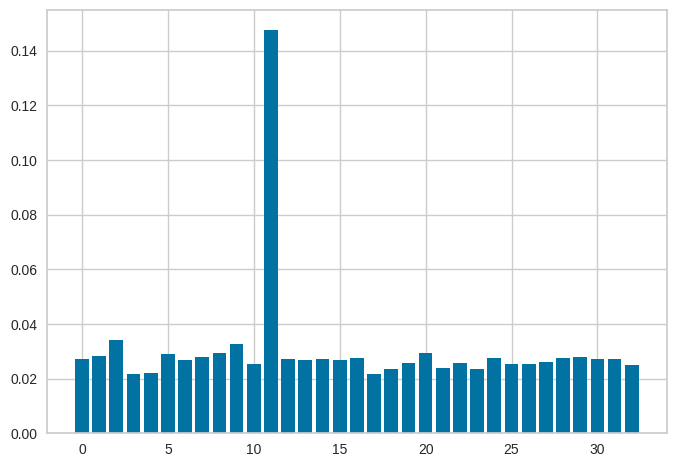

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(importancia_caracteristicas)), importancia_caracteristicas)
plt.show()

In [ ]:
df_importancia = pd.DataFrame({'Caracteristica': X_train.columns, 'Importancia': importancia_caracteristicas})

df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

print(df_importancia)

       Caracteristica  Importancia
11          Reactions     0.147545
2                 Age     0.034205
9     Standing_Tackle     0.032536
8      Sliding_Tackle     0.029490
20            Stamina     0.029270
5        Ball_Control     0.029046
1              Weight     0.028173
29              Curve     0.028072
7             Marking     0.027774
16         Short_Pass     0.027487
28         Long_Shots     0.027439
24            Jumping     0.027360
31          Penalties     0.027326
14          Composure     0.027287
12      Interceptions     0.027147
30  Freekick_Accuracy     0.027053
0              Height     0.027027
13             Vision     0.026931
15           Crossing     0.026784
6           Dribbling     0.026766
27          Finishing     0.026231
22            Balance     0.025796
19              Speed     0.025776
25            Heading     0.025464
10         Aggression     0.025444
26         Shot_Power     0.025207
32            Volleys     0.024922
21           Strengt

In [ ]:
from sklearn.feature_selection import RFECV

clf = XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')
rfecv.fit(X_train, y_train)
optimal_features = [f for f, s in zip(df.columns, rfecv.support_) if s]
print("Las características más críticas son:", optimal_features)
pred_feat = rfecv.predict(X_test)

Las características más críticas son: ['Height', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Marking', 'Interceptions', 'Short_Pass']


In [ ]:
print(classification_report(y_test, pred_feat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.50      0.16      0.24       215

    accuracy                           0.94      3518
   macro avg       0.72      0.57      0.60      3518
weighted avg       0.92      0.94      0.92      3518



**¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez?**

Se puede observar que el rendimiento con las características seleccionadas es muy similar al rendimiento que tiene el modelo con todas las variables. Igualmente, esto podría sugerir que las características eliminadas no aportaban información crucial para las predicciones, permitiendo mantener la precisión del modelo.

**¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.**

Se considera que eliminar variables del modelo tiene varios beneficios. En cuanto a la simplificación del modelo, se tiene que con menos variables, el modelo se vuelve más fácil de entender y manejar. Esto también facilita la interpretación de los resultados. Con respecto a la reducción del tiempo de entrenamiento, al tener menos variables significa que el modelo se puede entrenar más rápido, lo cual es especialmente útil cuando se trabaja con grandes conjuntos de datos o modelos complejos. Por otro lado, en cuanto a la mejora en la capacidad de generalización, se tiene que, al eliminar variables irrelevantes o redundantes, el modelo es menos propenso a realizar overfitting a los datos de entrenamiento. Esto significa que es más probable que el modelo funcione bien con datos nuevos y no vistos.

**Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo.**

Se puede mencionar que, en general, un modelo con menor cantidad de variables es más fácil de explicar, dado que hay que interpretar una menor cantidad de factores que puedan influir en las decisiones del modelo. Además, se tiene que con menos variables, se puede visualizar más facilmente cómo influye cada variable en el modelo y además se tiene un menor ruido, debido a que las variables que no son importantes y que podrían agregar información innecesaria, fueron eliminadas.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [ ]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

y_proba = clf.predict_proba(X_test)[:, 1]
pre_brier_score = brier_score_loss(y_test, y_proba)
print(f'Brier Score pre-calibración: {pre_brier_score:.4f}')

Brier Score pre-calibración: 0.0508


In [ ]:
clf_cal = CalibratedClassifierCV(estimator=clf, method='isotonic', cv='prefit')
clf_cal.fit(X_train, y_train)

CalibratedClassifierCV(cv='prefit', ensemble=True,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='binary:logistic', ...),
                       method='isotonic', n_jobs=None)

In [ ]:
y_proba_cal= clf_cal.predict_proba(X_test)[:, 1]
post_brier_score = brier_score_loss(y_test, y_proba_cal)
print(f'Brier Score post-calibración: {post_brier_score:.4f}')


Brier Score post-calibración: 0.0676


In [ ]:
# Segundo metodo de calibración
clf_cal2 = CalibratedClassifierCV(estimator=clf, method='sigmoid', cv='prefit')
clf_cal2.fit(X_train, y_train)


CalibratedClassifierCV(cv='prefit', ensemble=True,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='binary:logistic', ...),
                       method='sigmoid', n_jobs=None)

In [ ]:
y_proba_cal= clf_cal2.predict_proba(X_test)[:, 1]
post_brier_score2 = brier_score_loss(y_test, y_proba_cal)
print(f'Brier Score post-calibración 2: {post_brier_score2:.4f}')


Brier Score post-calibración 2: 0.0652


Se realiza la calibración del modelo mendiante dos métodos, primero con el método "isotonic" y luego con "sigmoid".

Tal como se puede ver, inicialmente se tiene un Brier score de 0.0508, el cual se busca disminuir para lograr una mayor precisión de las probabilidades predichas por el modelo.

Pero los resultados nos muestran que tanto con la calibración 1 como con la calibración 2 , el Brier score aumenta, lo que da indicios de que ninguna de las calibraciones logra mejorar la precisión de las predicciones.